Convertation nuScenes to Argoverse-suited format

In [17]:
import numpy as np
import pickle

# Epsilon is the amount of coverage in the set, 
# i.e. a real world trajectory is at most 8 meters from a trajectory in this set
# We released the set for epsilon = 2, 4, 8. Consult the paper for more information
# on how this set was created

PATH_TO_EPSILON_SET = "./trajectory_sets/epsilon_4.pkl"
trajectories_set = np.array(pickle.load(open(PATH_TO_EPSILON_SET, 'rb')))

In [18]:
trajectories_set.shape

(415, 12, 2)

In [19]:
import sys

# check duplicates
fixed_trajectory_set = []

for i in range(len(trajectories_set)):
    
    traj = trajectories_set[i]
    traj = np.concatenate(([[0, 0]], traj))
        
    for i in range(1, len(traj)):
        prev_point = traj[i - 1]
        next_point = traj[i]
        
        if prev_point[0] == next_point[0] and prev_point[1] == next_point[1]:
            print(prev_point, next_point)
            
            next_point[0] += sys.float_info.epsilon
            print(prev_point, next_point)
            
    fixed_trajectory_set.append(traj)
    
fixed_trajectory_set = np.array(fixed_trajectory_set)

[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[ 2.14884567 14.49465847] [ 2.14884567 14.49465847]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0.00013019 0.00140821] [0.00013019 0.00140821]
[0.00013019 0.00140821] [0.00013019 0.00140821]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]
[0. 0.] [0. 0.]
[0. 0.] [2.22044605e-16 0.00000000e+00]


In [20]:
trajectories_set = fixed_trajectory_set 

In [21]:
trajectories_set.shape

(415, 13, 2)

In [22]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import random

def plot_path(trajectories):
    
    fig = figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(111)
    
    for trajectory in trajectories:
        
        rand_color = [random.uniform(0.2, 1), random.uniform(0.2, 1), random.uniform(0.2, 1)]
        plt.plot(trajectory[:, 1], -trajectory[:, 0], color=rand_color)
        plt.scatter(trajectory[:, 1], -trajectory[:, 0], color=rand_color, s=6)
    
    # Keep aspect ratio of axis
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylabel('x (m)')
    ax.set_xlabel('y (m)')
    
    plt.grid()
    plt.show()

Trajectory filtration

In [23]:
# delta_x = 100
# delta_y = 100

# filtered_set = np.array([traj for traj in trajectories_set if traj[-1][1] > 0 and abs(traj[-1][0]) < delta_x and abs(traj[-1][1]) < delta_y])
# filtered_set.shape

In [24]:
from scipy import interpolate

def interpolate_trajectory(trajectory, output_amount_points = 31):

    tck, u = interpolate.splprep([trajectory[:, 0], trajectory[:, 1]], s=0.0)
    x_i, y_i = interpolate.splev(np.linspace(0, 1, output_amount_points), tck)
    traj = np.array(list(zip(x_i, y_i)))
    
    return traj

def convert_to_argo_format(trajectory):
    three_sec_trajectory = trajectory[:-6]    
    #plot_path([three_sec_trajectory])
    
    traj = interpolate_trajectory(three_sec_trajectory)
    traj = traj[1:]
    
    #print(traj.shape)
    
    return traj

def convert_set_to_argo(trajectory_set):
    argo_traj_set = []

    for traj in trajectories_set:
        argo_traj = convert_to_argo_format(traj)
        argo_traj_set.append(argo_traj)
        
    return argo_traj_set

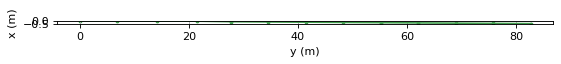

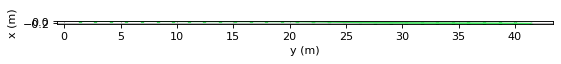

In [25]:
test_trajectory = trajectories_set[13]
plot_path([test_trajectory])

argo_trajectory = convert_to_argo_format(test_trajectory)
plot_path([argo_trajectory])

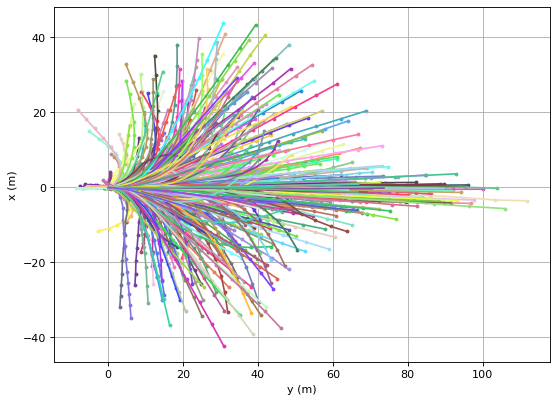

In [26]:
plot_path(trajectories_set)

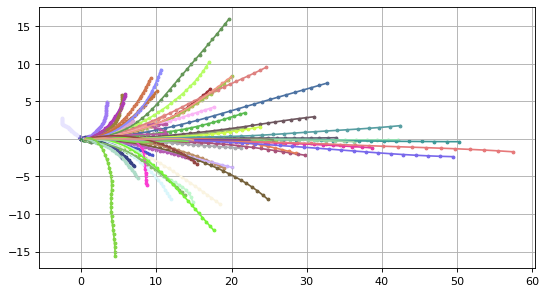

In [330]:
argo_traj_set = convert_set_to_argo(trajectories_set)
plot_path(argo_traj_set) 

In [331]:
# Save as pickle-file

with open('./trajectory_sets/epsilon_8_argo.pkl', 'wb') as handle:
    pickle.dump(argo_traj_set, handle, protocol=pickle.HIGHEST_PROTOCOL)